# RNA Energy Barriers Exploration

This notebook explores the implementation of RNA structure manipulation and path finding algorithms.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

import RNA

from rna_structure import RNAStructure
from path_finding import find_direct_path

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Testing Basic RNA Structure Operations

Sequence: GGGAAACCC
Structure: (((...)))
Base pairs: {(1, 7), (2, 6), (0, 8)}


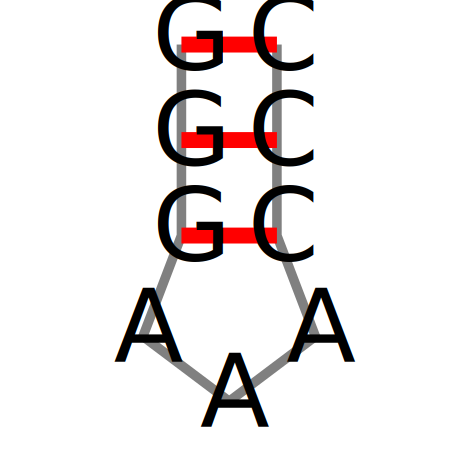

In [48]:
# Create a simple RNA structure
sequence = "GGGAAACCC"
structure = "(((...)))"

rna = RNAStructure(sequence, structure)
print(f"Sequence: {sequence}")
print(f"Structure: {structure}")
print(f"Base pairs: {rna.base_pairs}")

RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp.svg")
SVG("tmp.svg")

## 2. Testing Structure Manipulation

Initial structure: .........
After adding (0,8): (.......)


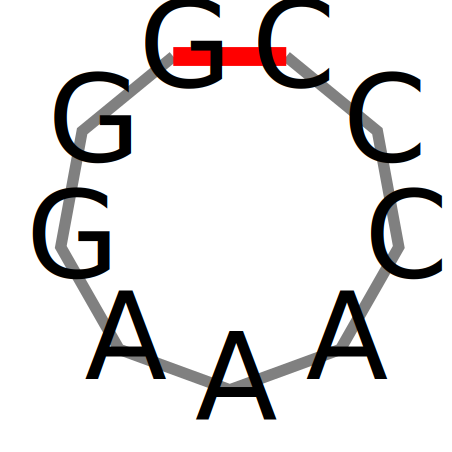

In [49]:
# Test adding and removing base pairs
rna2 = RNAStructure(sequence)
structure = rna2.to_dotbracket()
print("Initial structure:", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp0.svg")
SVG("tmp0.svg")

rna2.add_pair(0, 8)
structure = rna2.to_dotbracket()
print("After adding (0,8):", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp1.svg")
SVG("tmp1.svg")

After adding (1,7): ((.....))


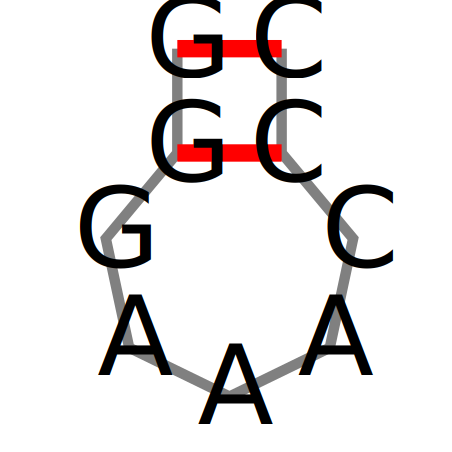

In [50]:
rna2.add_pair(1, 7)
structure = rna2.to_dotbracket()
print("After adding (1,7):", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp2.svg")
SVG("tmp2.svg")

After removing (0,8): .(.....).


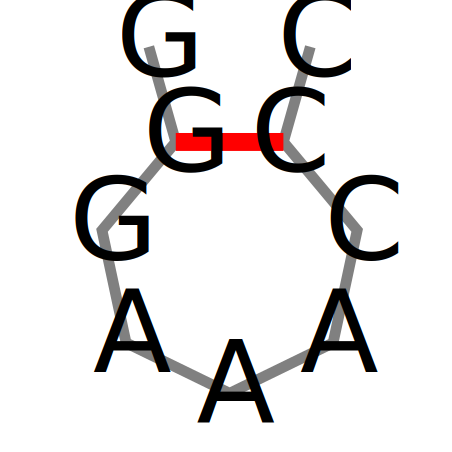

In [51]:
rna2.remove_pair(0, 8)
structure = rna2.to_dotbracket()
print("After removing (0,8):", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp3.svg")
SVG("tmp3.svg")

## 3. Testing Path Finding

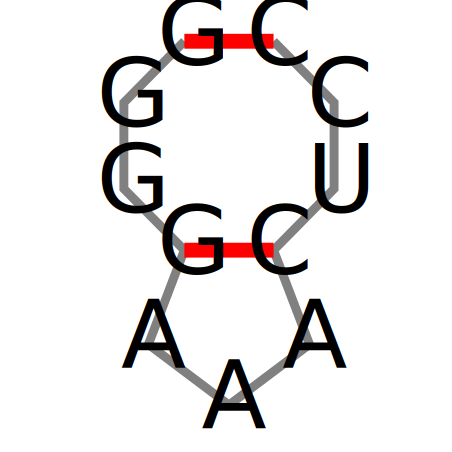

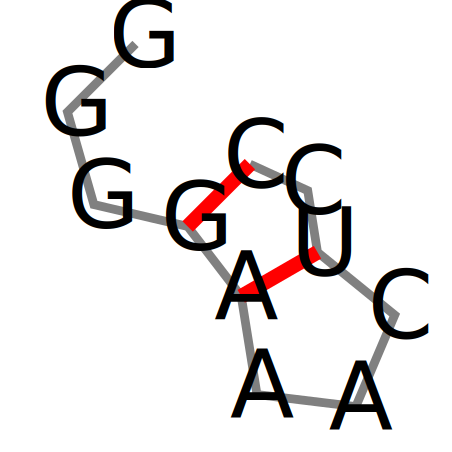

Direct path:
Step 0: (..(...)..)


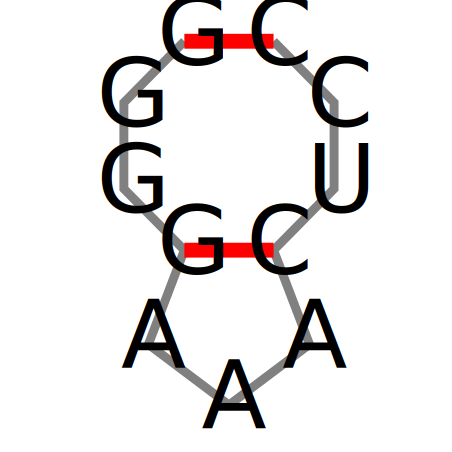

Step 1: (.........)


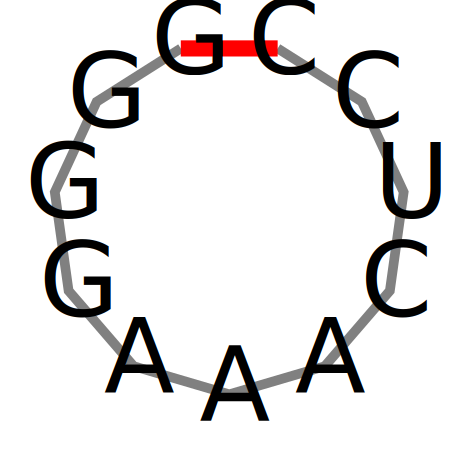

Step 2: ...........


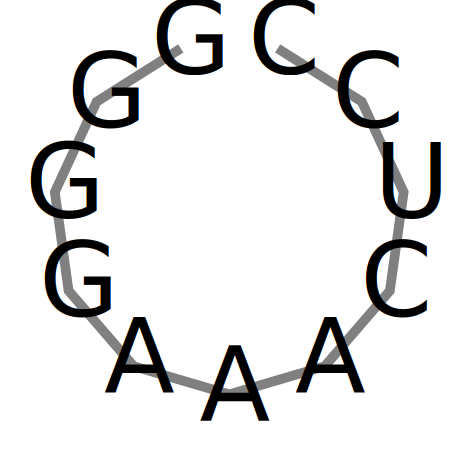

Step 3: ...(......)


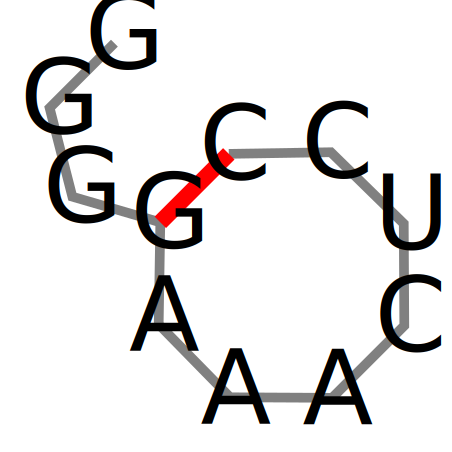

Step 4: ...((...).)


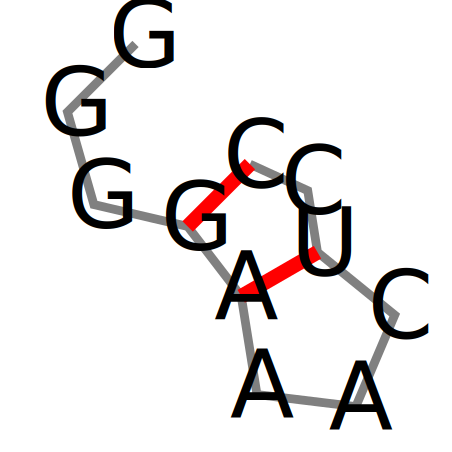

In [56]:
# Define start and end structures
sequence = "GGGGAAACUCC"
start_struct = "(..(...)..)"
end_struct = "...((...).)"  # A different valid structure

RNA.svg_rna_plot(sequence, structure=start_struct, ssfile="tmp_start.svg")
RNA.svg_rna_plot(sequence, structure=end_struct, ssfile="tmp_end.svg")

start = RNAStructure(sequence, start_struct)
end = RNAStructure(sequence, end_struct)

display(SVG("tmp_start.svg"), SVG("tmp_end.svg"))

# Find direct path
direct_path = find_direct_path(start, end)
print("Direct path:")
for i, struct in enumerate(direct_path):
    print(f"Step {i}: {struct.to_dotbracket()}")
    RNA.svg_rna_plot(sequence, structure=struct.to_dotbracket(), ssfile=f"tmp.svg")
    display(SVG(f"tmp.svg"))
   


## 4. Analyzing Energy Barriers

For now, we're using a simple energy model (negative number of base pairs). Later we'll integrate with ViennaRNA for more accurate energy calculations.

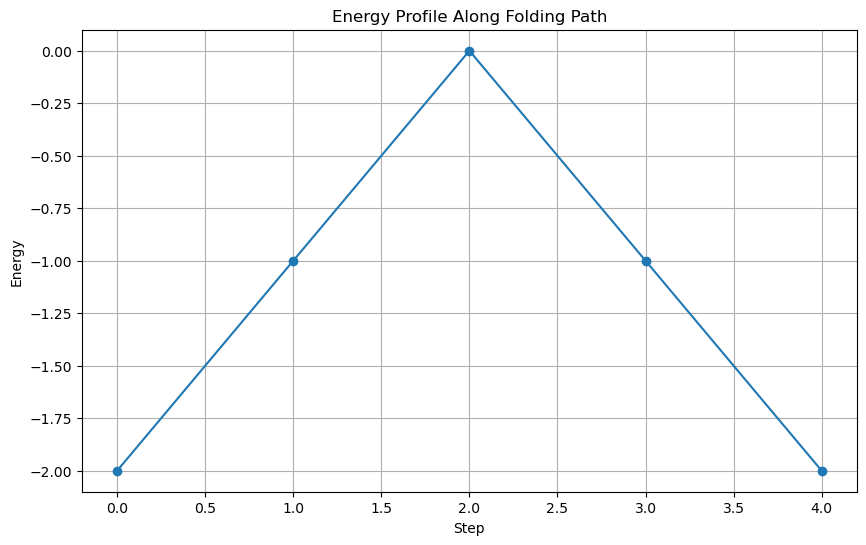

Direct path barrier: 2


In [53]:
def plot_energy_profile(path, energy_function=lambda s: -len(s.base_pairs)):    
    energies = [energy_function(s) for s in path]
    plt.figure(figsize=(10, 6))
    plt.plot(energies, '-o')
    plt.xlabel('Step')
    plt.ylabel('Energy')
    plt.title('Energy Profile Along Folding Path')
    plt.grid(True)
    plt.show()
    
    return max(energies) - energies[0]  # barrier height

print("Direct path barrier:", plot_energy_profile(direct_path))